[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11_mgNdrxlEiez9W9o4FOhHbfAso0hrsU?usp=sharing)

# EDA and Data Preparation

In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab 
import scipy.stats as stats

In [10]:
df = pd.read_csv("census.csv")

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


We will only use the aage column for testing several univariate plots.

## Histogram

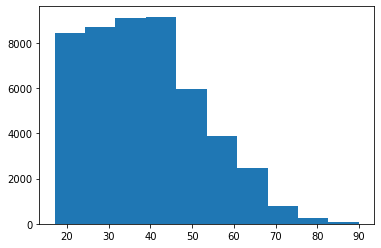

In [12]:
#matplotlib
plt.hist(df["age"])
plt.show()

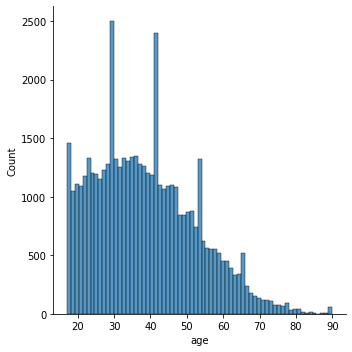

In [13]:
#seaborn
sns.displot(df["age"])

In [14]:
# plotly
px.histogram(df, "age")

## Density plot

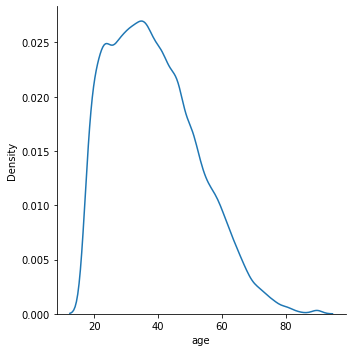

In [15]:
sns.displot(df["age"], kind="kde")

## Box plot

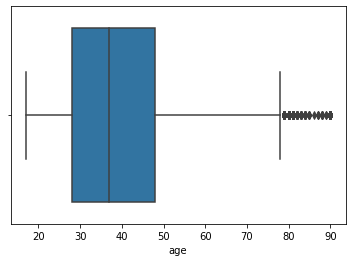

In [16]:
sns.boxplot(data=df, x="age")

##Violin plot

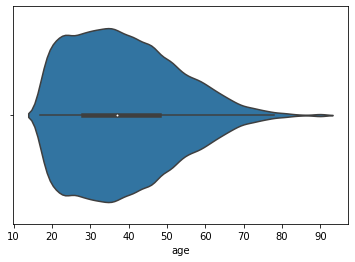

In [17]:
sns.violinplot(data=df, x="age")

## QQ plot

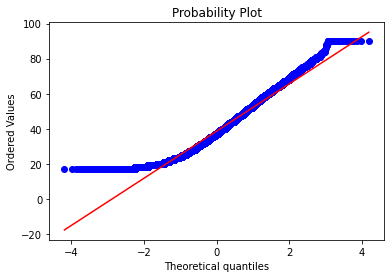

In [18]:
stats.probplot(df["age"], dist="norm", plot=pylab)
pylab.show()

## Bar plot

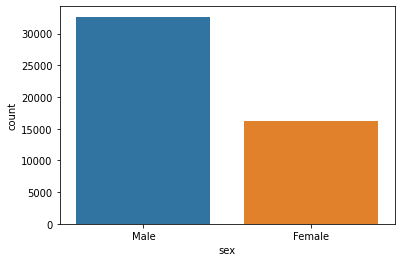

In [19]:
sns.countplot(data=df, x="sex")

## Side-by-side boxplot

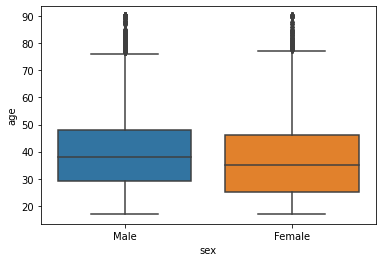

In [20]:
sns.boxplot(data=df, x="sex", y="age")

## Scatter plot

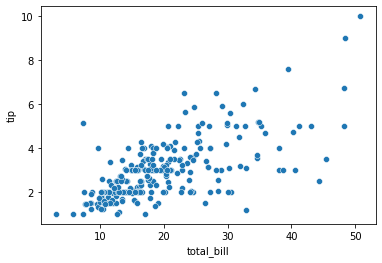

In [21]:
tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", data=tips)

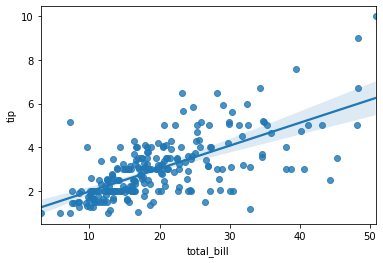

In [22]:
sns.regplot(x="total_bill", y="tip", data=tips)

## Data Preparation

### Dealing with missing data 

In our census daatframe the missing value character is "?", so let's specify that to get some missing data.

**Disclaimer: The transformations below doesn't make sense regaring modeling or better understandin the data, they're just examples on how to deal with misssing data.**

In [23]:
missing_value_formats = ["?"]
df = pd.read_csv("census.csv", na_values = missing_value_formats)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [25]:
print(df.isnull().values.any())

True


In [26]:
# Methods for deleting missing values

# drop all rows with atleast one NaN (I'll go with this one)
new_df = df.dropna(axis = 0, how ='any')  

# drop all rows with all NaN
#new_df = df.dropna(axis = 0, how ='all')

# drop all columns with atleast one NaN
#new_df = df.dropna(axis = 1, how ='any')

# drop all columns with all NaN
#new_df = df.dropna(axis = 1, how ='all')

In [27]:
print(new_df.isnull().values.any())

False


In [28]:
# Replace missing with a constant 

df["education-num"].fillna(0, inplace=True)
df["workclass"].fillna("no-info", inplace=True)

In [29]:
# Replacing NaNs with the value from the previous row

df['occupation'].fillna(method='pad', inplace=True)

In [30]:
# Replacing NaNs with the value from the next row
df['native-country'].fillna(method='bfill', inplace=True)

In [31]:
# Replacing NaNs using Median/Mean of the column

# using median
df['age'].fillna(df['age'].median(), inplace=True)
#using mean
df['hours-per-week'].fillna(int(df['hours-per-week'].mean()), inplace=True)

## Drop duplicates

In [32]:
df = df.drop_duplicates()

## One-Hot-Enconding

In [33]:
df = pd.get_dummies(df)

In [34]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_no-info,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Standarization

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)

In [37]:
scaler.transform(df)

array([[-0.99582483,  0.35159882, -1.19802642, ..., -0.02171594,
         0.56101068, -0.56101068],
       [-0.04751028, -0.94544964, -0.4197941 , ..., -0.02171594,
         0.56101068, -0.56101068],
       [-0.77698301,  1.3945266 ,  0.74755439, ..., -0.02171594,
        -1.78249726,  1.78249726],
       ...,
       [ 1.41143517, -0.35750383, -0.4197941 , ..., -0.02171594,
         0.56101068, -0.56101068],
       [-1.21466665,  0.11193629, -0.4197941 , ..., -0.02171594,
         0.56101068, -0.56101068],
       [ 0.97375154,  0.93035088, -0.4197941 , ..., -0.02171594,
        -1.78249726,  1.78249726]])